<a href="https://colab.research.google.com/github/Pravallikakh05/Happiness-Score-Prediction/blob/main/HappinessScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Happiness score reports from 2015-2019

Download the datasets from https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go


In [2]:
df=pd.read_csv('2015.csv')

In [3]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
df.shape

(158, 12)

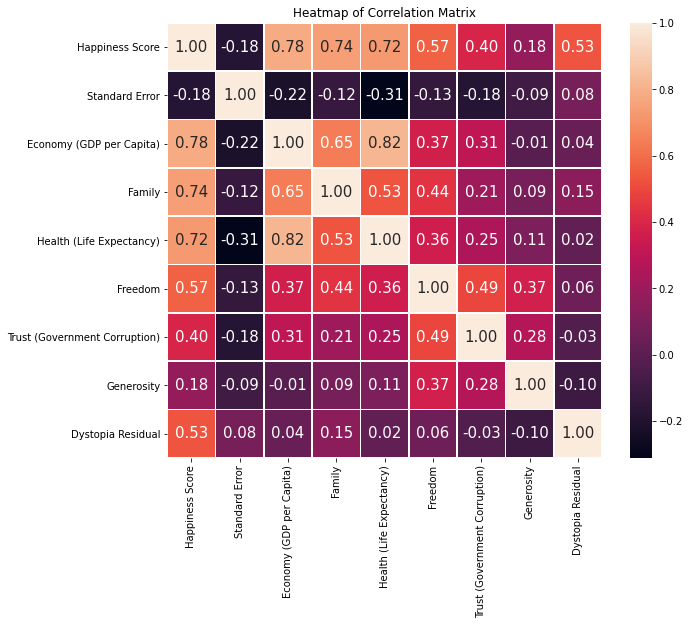

In [5]:
plt.figure(figsize=(10,8))
corr = df.drop(['Country','Region','Happiness Rank'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.title('Heatmap of Correlation Matrix 2015')
plt.show()

In [7]:
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)
y = df['Happiness Score']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape
X_test.shape

(32, 8)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [28]:
lm.score(X_test,y_test)

0.9999999472734886

In [22]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
128,4.307,4.306895,0.000105
45,5.987,5.987110,-0.000110
134,4.194,4.194273,-0.000273
156,2.905,2.904498,0.000502
90,5.057,5.057193,-0.000193


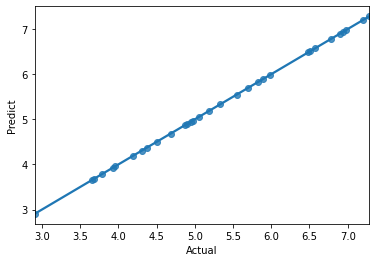

In [23]:
sns.regplot(x='Actual',y='Predict',data=result_lm)

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.00023115512532785598
MSE: 7.480577343243336e-08
RMSE: 0.000273506441299713


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [30]:
rf.score(X_test,y_test)

0.9347802961626764

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2159493749999998
MSE: 0.08133913987500002
RMSE: 0.28520017509636986


In [31]:
#MULTILAYER PERCEPTRON
from sklearn.neural_network import MLPRegressor

#2 hidden layers with 30 and 20 neurons each
mlp = MLPRegressor(hidden_layer_sizes=(30,20), solver='lbfgs', learning_rate='adaptive', max_iter=1000, learning_rate_init=0.01)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

#Root Mean Square Error for MLP without cross validation
print('RMSE Without Cross Validation:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

train_test_score = mlp.score(X_test,y_test)
print('Train/Test score:',train_test_score)

RMSE Without Cross Validation: 0.0029648085734276966
Train/Test score: 0.9999938043448666
